# EDA Project on Healthcare data - By Mohamed Shafeek

##### Importing all crucial libraries.

In [71]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date

##### Reading a medical appointment csv file using pandas's read_csv datatype.

In [72]:
data = pd.read_csv('Data.csv')

In [73]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [74]:
#Checking number of rows and columns
data.shape

(110527, 14)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Converting date and time to standard time 

In [76]:

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

#datetime64 is a pandas datatype and ns stands for nano second

In [77]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


##### Creating new column to analyse day of the week

In [78]:

data['sch_weekday'] =  data['ScheduledDay'].dt.dayofweek
data['app_weekday'] =  data['AppointmentDay'].dt.dayofweek

In [79]:
data['sch_weekday'].value_counts()


1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [80]:
data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

##### Dayofweek is a pandas's datatype to find the day of a week (0-mon,3,4,5,6-sun)
##### From above result, we can see that most of the scheduled and appointments are on weekdays than weekends

##### Visualizing the results

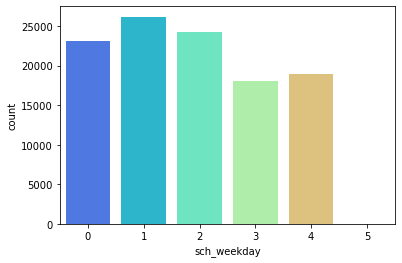

In [81]:
sch_week_plot = sns.countplot(x=data['sch_weekday'],data=data,palette='rainbow')

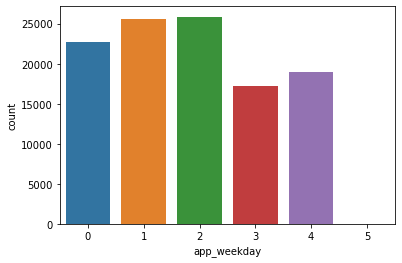

In [82]:
app_week_plot = sns.countplot(x=data['app_weekday'],data=data)

In [83]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

##### Correcting spelling mistakes of columns name

In [84]:
data=data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSreceived','No-show':'Noshow'})

In [85]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSreceived     110527 non-null  int64         
 13  Noshow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [87]:
data=data.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1)

In [89]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived',
       'Noshow', 'sch_weekday', 'app_weekday'],
      dtype='object')

##### Returning values for aggregate functions using 'describe()' function.

In [90]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


In [91]:
data['Noshow'].value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

Text(0.5, 1.02, 'Count of Target variable per category')

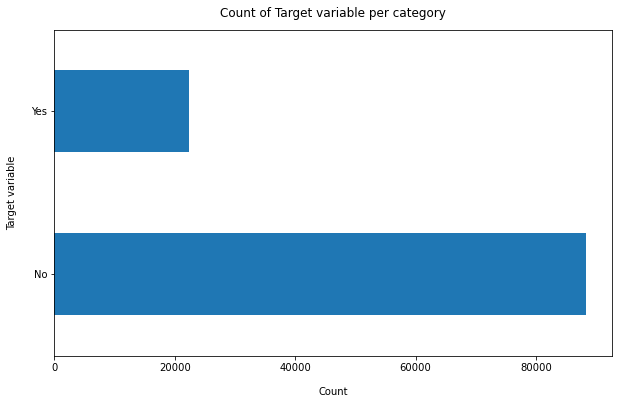

In [102]:
data['Noshow'].value_counts().plot(kind='barh',figsize=(10, 6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target variable',labelpad=14)
plt.title('Count of Target variable per category',y=1.02)

##### Calculating the percentage of Appointment or not

In [97]:
100*data['Noshow'].value_counts()/len(data['Noshow'])

No     79.806744
Yes    20.193256
Name: Noshow, dtype: float64

##### So infer that approximately 80% of appointment says no

##### Having a look that data contains missing values or not

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


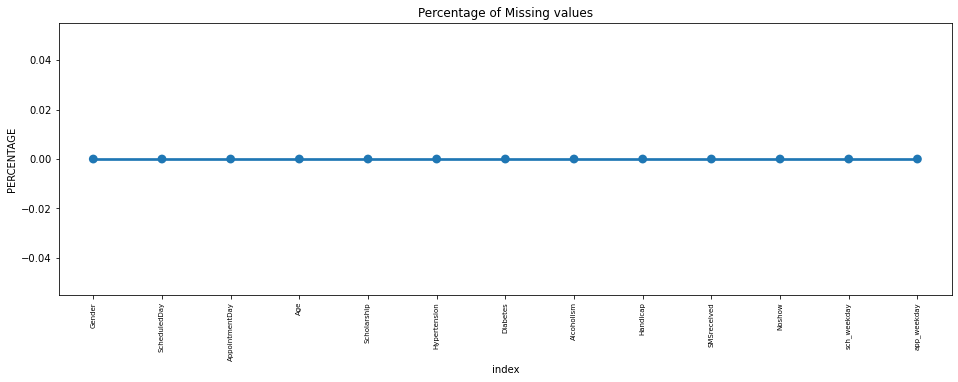

In [103]:

missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

##### Missing Data - Initial Intuition
##### Here, we don't have any missing data.

##### For features with less missing values, we can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

##### For features with very high number of missing values it is better to drop those columns as they give very less insight on analysis.

##### If we have more than 30-40% of missing values, deleting those might be effective.

##### There is no need of  DATA CLEANING since there is no NULL values.


In [104]:
data['Age'].max()

115

##### Grouping the tenure in bins of 12 months

In [106]:

labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

data['Age_group'] = pd.cut(data.Age, range(1, 130, 20), right=False, labels=labels)

data.drop(['Age'], axis=1, inplace=True)

##### Having a look into the values of count of each columns and there count in respect to NoShow column

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

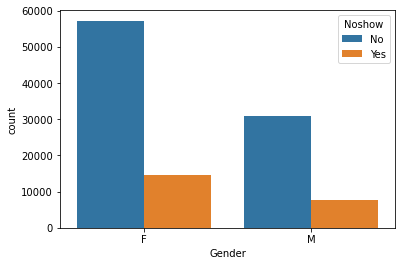

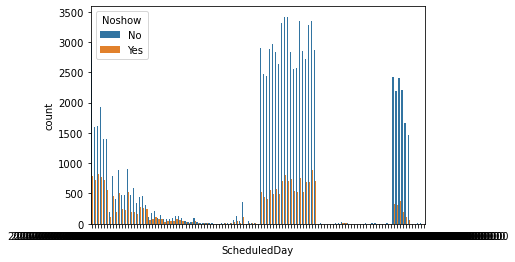

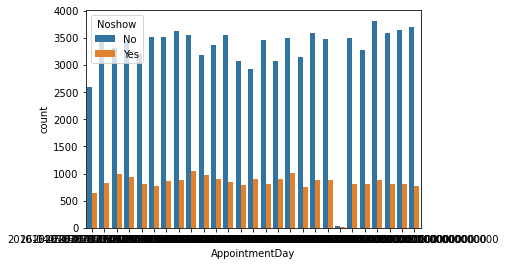

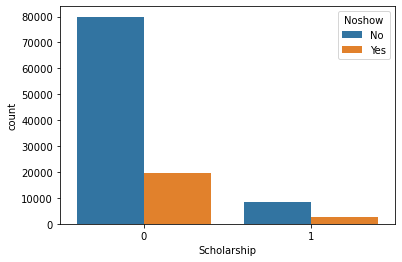

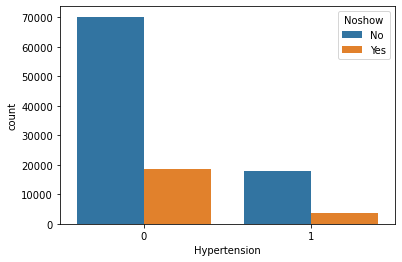

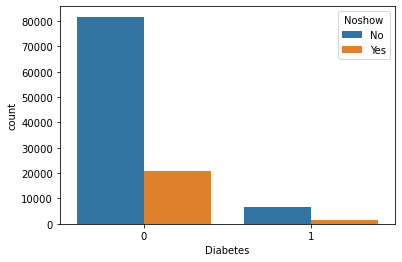

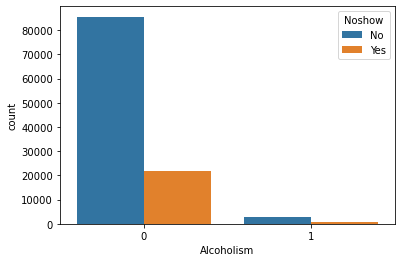

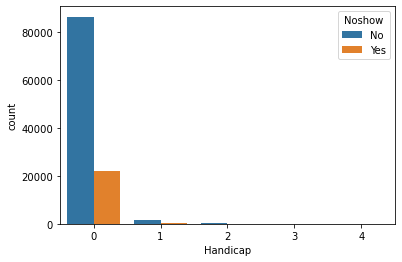

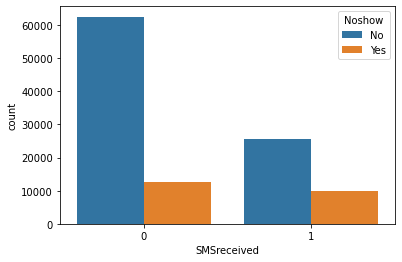

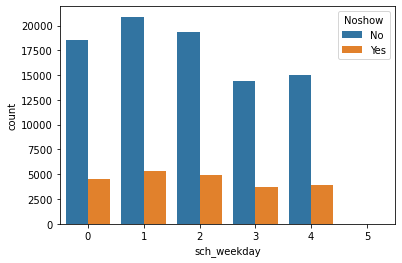

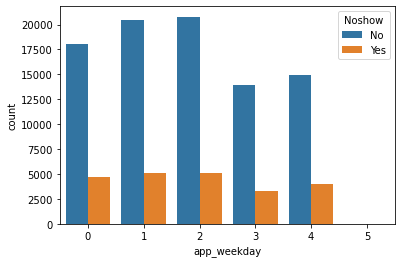

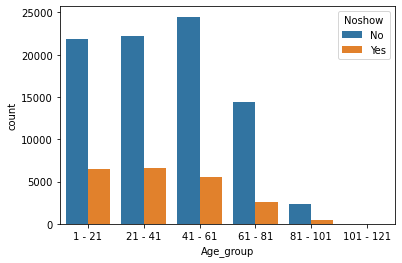

In [109]:

for i, predictor in enumerate(data.drop(columns=['Noshow'])):
    print('-'*10,predictor,'-'*10)
    print(data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Noshow')
    
# The enumerate() function takes in an iterable as an argument, such as a list, string, tuple, or dictionary.

In [112]:
data['Noshow'] = np.where(data.Noshow == 'Yes',1,0) #Changing No as 0 and Yes as 1

In [113]:
data['Noshow'].value_counts()

0    88208
1    22319
Name: Noshow, dtype: int64

##### Convert all the categorical variables into dummy variables

In [114]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

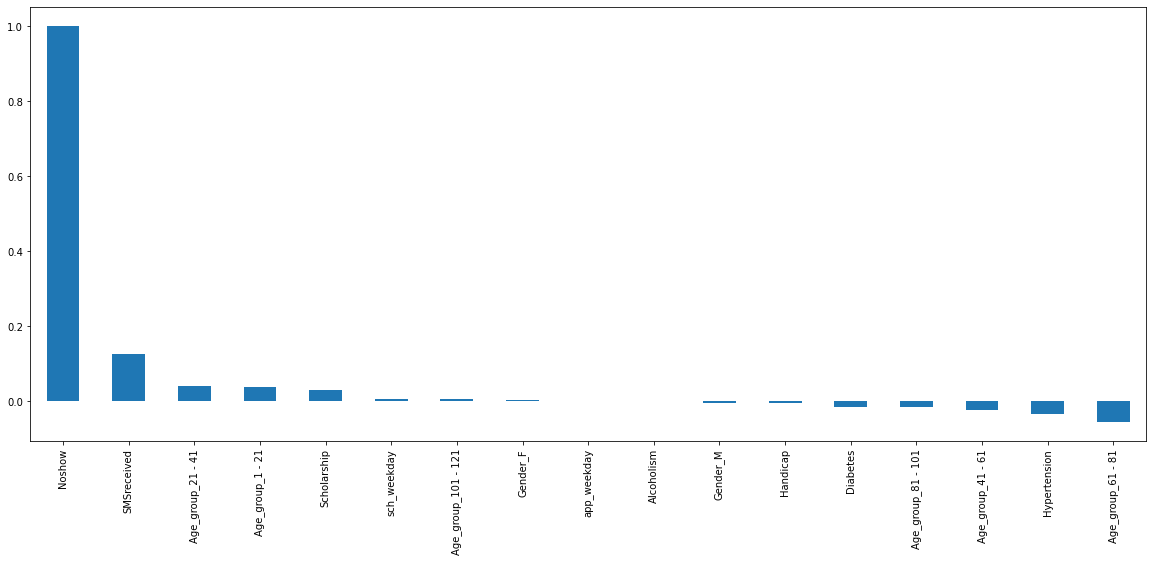

In [115]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Noshow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

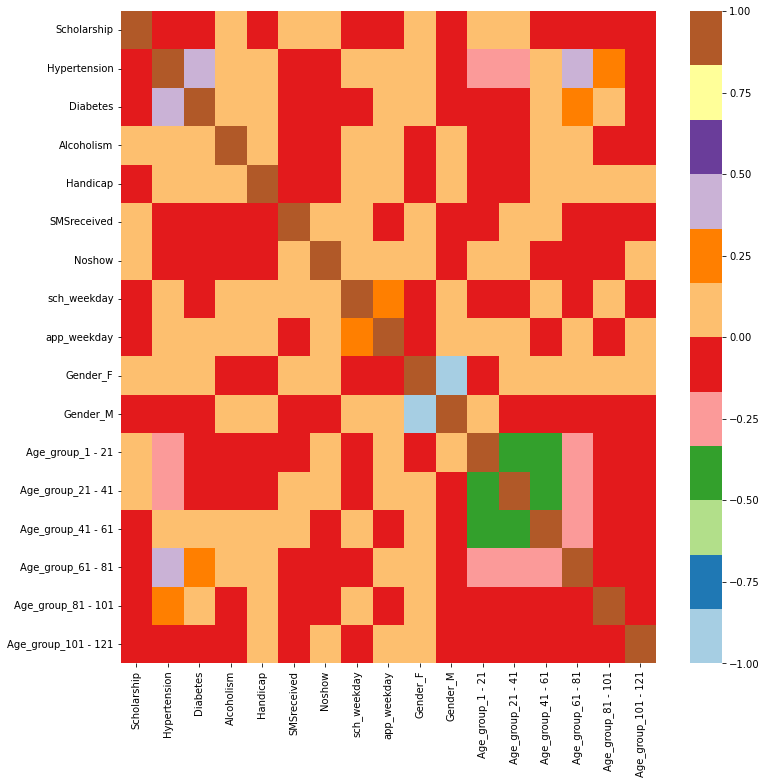

In [116]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

##### Biveriate Analysis

In [119]:

new_df1_target0=data.loc[data["Noshow"]==0]
new_df1_target1=data.loc[data["Noshow"]==1]

In [120]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        

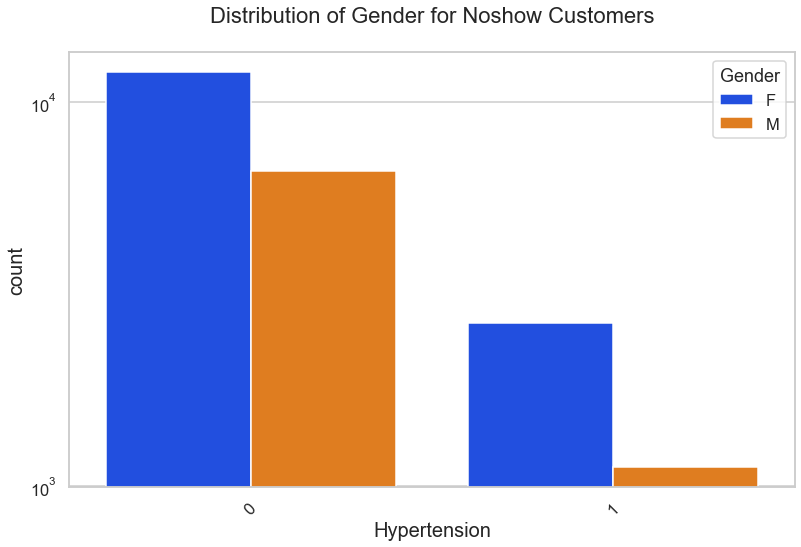

In [122]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for Noshow Customers',hue='Gender')


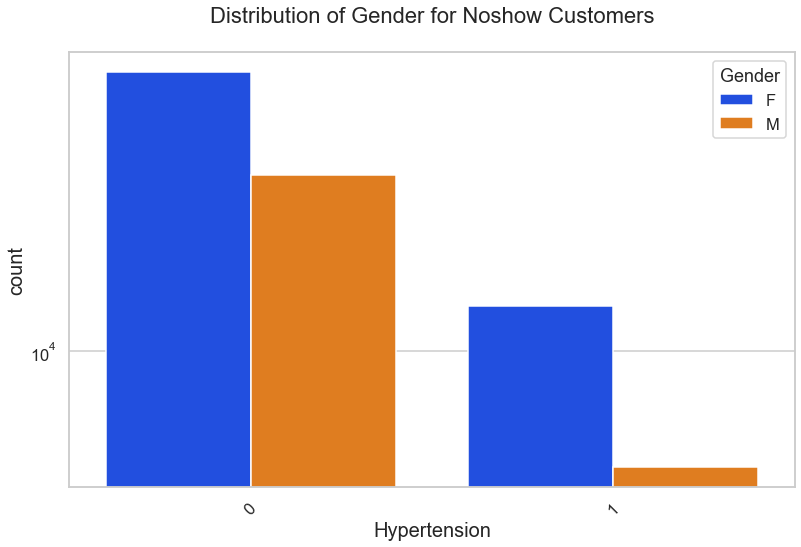

In [124]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for Noshow Customers',hue='Gender')


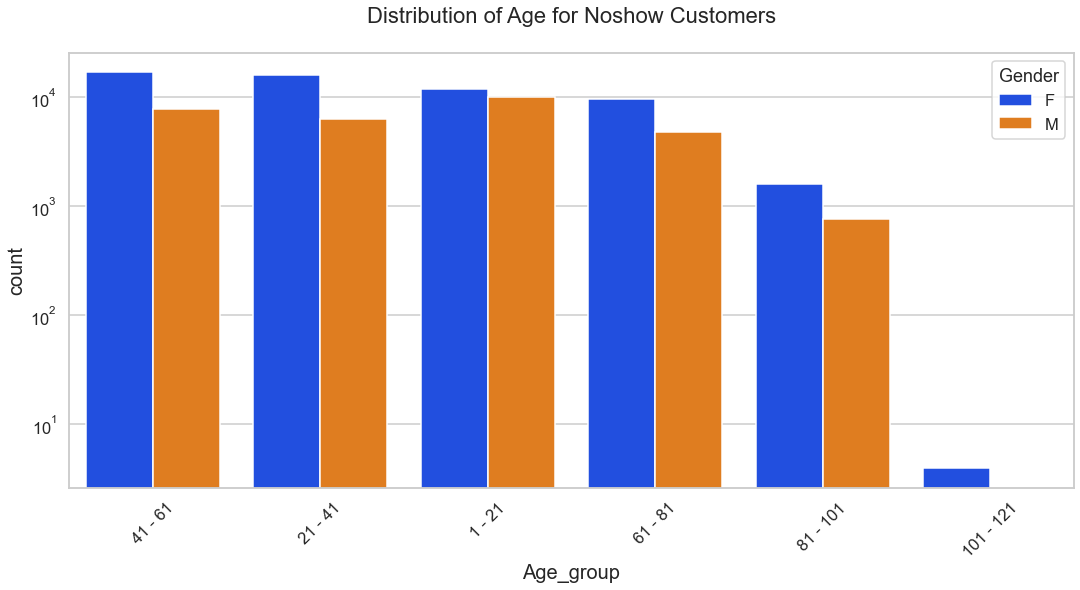

In [125]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for Noshow Customers',hue='Gender')

## Final conclusion or Insights we have found so far

##### 1)Female patients have taken more appointments then male patients
##### 2)Ratio of Noshow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
##### 3)Each Neighbourhood have almost 80% show rate
##### 4)There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
##### 5)There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
##### 6)There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
##### 7)There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
##### 8)There is no appointments on sunday and on saturday appointments are very less in comparision to other week days.
